Text(0.5, 0, '$N_d$')

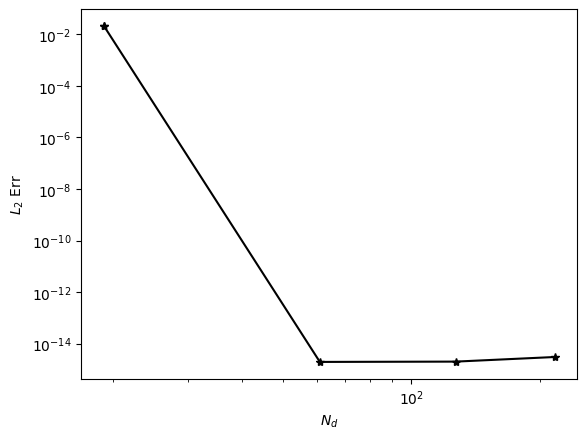

In [9]:
from ngsolve import *
from ngsolve.webgui import Draw
from netgen.occ import *
from netgen.webgui import Draw as Drawgeo
import matplotlib.pyplot as plt
import numpy as np
from netgen.geom2d import unit_square


mesh = Mesh(unit_square.GenerateMesh(maxh=0.3))



err = []
ndof = []

g = CF(x**2 - y**2)
gradg = CF((2*x, -2*y))

for p in range(5):
    fes = H1(mesh, order=p, dirichlet='top')
    u, v = fes.TnT()
    a = BilinearForm(fes)
    a += grad(u) * grad(v) * dx
    a.Assemble()
    
    f = LinearForm(fes)
    f += specialcf.normal(dim=2) * gradg * v * ds('bottom|right|left')
    f.Assemble()
    
    gfu = GridFunction(fes)
    gfu.Set(g, BND)
    
    r = f.vec - a.mat * gfu.vec
    gfu.vec.data += a.mat.Inverse(freedofs=fes.FreeDofs()) * r
    
    err += [sqrt(Integrate((gfu - g)**2, mesh))]
    ndof += [fes.ndof]


plt.figure()
plt.loglog(ndof, err, 'k-*')
plt.ylabel('$L_2$ Err')
plt.xlabel('$N_d$')

In [10]:
Draw(gfu, mesh)
Draw(g, mesh)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

BaseWebGuiScene